In [410]:
%matplotlib inline
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

In [411]:
births = pd.read_csv("births_data.csv") # loading the data
births.head() # previewing the data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [412]:
# exploring the data and looking for anomalies
print("df.shape = ", births.shape)
print(" ##### ")
print("NaNs:")
print(births.isna().sum())
print(" ##### ")
print("duplications: ",births.duplicated().sum())
print(births.dtypes)
births.describe()

df.shape =  (15547, 5)
 ##### 
NaNs:
year        0
month       0
day       480
gender      0
births      0
dtype: int64
 ##### 
duplications:  0
year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object


,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [413]:
# we notice that there are some NaNs and some days are larger than 31 (max(day) = 99).
# also our dataset begins in 1969 which will affect the overall statistics when comparing the 3 decades
# but there is nothing we can do about it

# removing the anomalies:
# dropping NaNs
births.dropna(inplace=True)
print("NaNs:")
print(births.isna().sum())
print(" ##### ")
# dropping day > 31
print((births[births['day'] > 31.0]).count())
births.drop(births[births['day'] > 31.0 ].index , inplace=True)
births.describe()

NaNs:
year      0
month     0
day       0
gender    0
births    0
dtype: int64
 ##### 
year      350
month     350
day       350
gender    350
births    350
dtype: int64


,year,month,day,births
count,14717.000000,14717.000000,14717.000000,14717.000000
mean,1978.463070,6.517361,15.838078,4789.463749
std,5.768439,3.449543,8.859636,708.016776
min,1969.000000,1.000000,1.000000,1.000000
25%,1973.000000,4.000000,8.000000,4374.000000
50%,1978.000000,7.000000,16.000000,4807.000000
75%,1983.000000,10.000000,23.000000,5256.000000
max,1988.000000,12.000000,31.000000,6527.000000


In [414]:
# If we try to call 'to_datetime' as:

##  births['Datetime'] = pd.to_datetime(births[['year', 'month', 'day']], format='%Y/%m/%d')

# the following error is risen: ValueError: day is out of range for month

# Maybe there are some days larger than 29th for February in the dataframe ?
births[(births['day'] >= 29) & (births['month'] == 2)]
# Indeed, there are ! We need to remove them before calling 'to_datetime'

,year,month,day,gender,births
120,1969,2,29.0,F,50
121,1969,2,29.0,M,16
122,1969,2,30.0,F,24
123,1969,2,30.0,M,28
124,1969,2,31.0,F,24
125,1969,2,31.0,M,20
888,1970,2,29.0,F,38
889,1970,2,29.0,M,44
890,1970,2,30.0,F,20
891,1970,2,30.0,M,12


In [415]:
# But we also notice that there are several 29th of February for non-leap years and also some 31st for months 
# with 30 days like September !
births[(births['day'] == 31) & (births['month'] == 9)]

,year,month,day,gender,births
572,1969,9,31.0,F,38
573,1969,9,31.0,M,30
1340,1970,9,31.0,F,40
1341,1970,9,31.0,M,34
2104,1971,9,31.0,F,2
2105,1971,9,31.0,M,14
2869,1972,9,31.0,F,2
2870,1972,9,31.0,M,2
3632,1973,9,31.0,F,4
3633,1973,9,31.0,M,2


In [416]:
# In this case, instead of dealing manually with Gregorian calendar, we call 'to_datetime' using the option
# errors='coerce' which will place NaT values for invalid dates, and then we clear the dataset:
births['datetime'] = pd.to_datetime(births[['year', 'month', 'day']], format='%Y/%m/%d', errors='coerce')

In [417]:
# Let's see the NaT objects with their index and other columns:
births[births['datetime'].isna()]

,year,month,day,gender,births,datetime
120,1969,2,29.0,F,50,NaT
121,1969,2,29.0,M,16,NaT
122,1969,2,30.0,F,24,NaT
123,1969,2,30.0,M,28,NaT
124,1969,2,31.0,F,24,NaT
125,1969,2,31.0,M,20,NaT
252,1969,4,31.0,F,28,NaT
253,1969,4,31.0,M,24,NaT
380,1969,6,31.0,F,20,NaT
381,1969,6,31.0,M,40,NaT


In [418]:
# Removing all NaTs:
births.drop(births[births['datetime'].isna()].index , inplace=True)
# Checking the result:
print((births[births['datetime'].isna()]).count())
print(births.dtypes)
births.describe()

year        0
month       0
day         0
gender      0
births      0
datetime    0
dtype: int64
year                 int64
month                int64
day                float64
gender              object
births               int64
datetime    datetime64[ns]
dtype: object


,year,month,day,births
count,14610.000000,14610.000000,14610.000000,14610.000000
mean,1978.501027,6.522930,15.729637,4824.470089
std,5.766538,3.448821,8.800393,579.996983
min,1969.000000,1.000000,1.000000,3249.000000
25%,1974.000000,4.000000,8.000000,4383.000000
50%,1979.000000,7.000000,16.000000,4812.000000
75%,1984.000000,10.000000,23.000000,5259.000000
max,1988.000000,12.000000,31.000000,6527.000000


In [419]:
# Let's see if pandas removed only the 29th od February for non_leap years:
births[(births['day'] == 29) & (births['month'] == 2)]
# It did ! pandas manages Gregorian calendar like a champ !

,year,month,day,gender,births,datetime
2420,1972,2,29.0,F,4663,1972-02-29
2421,1972,2,29.0,M,4919,1972-02-29
5476,1976,2,29.0,F,3681,1976-02-29
5477,1976,2,29.0,M,3878,1976-02-29
8504,1980,2,29.0,F,4646,1980-02-29
8505,1980,2,29.0,M,4969,1980-02-29
11495,1984,2,29.0,F,4773,1984-02-29
11496,1984,2,29.0,M,4907,1984-02-29
14446,1988,2,29.0,F,4859,1988-02-29
14447,1988,2,29.0,M,4939,1988-02-29


In [420]:
# we can drop the columns 'year', 'month' and 'day' now that we have a datetime64 type column:
births_clean = births.drop(['year', 'month', 'day'], axis=1)
# Dataset looks fine now.
births_clean.head()

,gender,births,datetime
0,F,4046,1969-01-01
1,M,4440,1969-01-01
2,F,4454,1969-01-02
3,M,4548,1969-01-02
4,F,4548,1969-01-03


In [421]:
# In order to aggregate our data, it might be a good idea to index over datetime column:
births_clean.index = births_clean['datetime']
births_clean.head()

,gender,births,datetime
datetime,,,
1969-01-01,F,4046,1969-01-01
1969-01-01,M,4440,1969-01-01
1969-01-02,F,4454,1969-01-02
1969-01-02,M,4548,1969-01-02
1969-01-03,F,4548,1969-01-03


In [422]:
# we add the day of the week's name column to our cleaned and indexed dataframe

births_clean['weekday'] = births_clean['datetime'].dt.weekday_name
births_clean.head()

,gender,births,datetime,weekday
datetime,,,,
1969-01-01,F,4046,1969-01-01,Wednesday
1969-01-01,M,4440,1969-01-01,Wednesday
1969-01-02,F,4454,1969-01-02,Thursday
1969-01-02,M,4548,1969-01-02,Thursday
1969-01-03,F,4548,1969-01-03,Friday


In [423]:
# we create the 3 dataframes for the 3 decades: 60s, 70s and 80s:
sixties = births_clean['1960-01-01':'1969-12-31'] 
# unfortunately our original dataset begins in 1969-01-01, therefore the sixties dataframe
# will be much smaller than the other two
seventies = births_clean['1970-01-01':'1979-12-31']
eighties = births_clean['1980-01-01':'1989-12-31']
sixties.head()

,gender,births,datetime,weekday
datetime,,,,
1969-01-01,F,4046,1969-01-01,Wednesday
1969-01-01,M,4440,1969-01-01,Wednesday
1969-01-02,F,4454,1969-01-02,Thursday
1969-01-02,M,4548,1969-01-02,Thursday
1969-01-03,F,4548,1969-01-03,Friday


In [424]:
# finally we can aggregate our sub-dataframes using groupby and perform basic relational 
# algebra on them, such as counting the total births per day of the week:
print("60s :")
six = sixties.groupby('weekday').sum()
print(six)
print("70s :")
sev = seventies.groupby('weekday').sum()
print(sev)
print("80s :")
eig = eighties.groupby('weekday').sum()
print(eig)

60s :
           births
weekday          
Friday     531220
Monday     526638
Saturday   483710
Sunday     451604
Thursday   517742
Tuesday    549754
Wednesday  537910
70s :
            births
weekday           
Friday     4992508
Monday     4895418
Saturday   4392927
Sunday     4154367
Thursday   4903588
Tuesday    5090433
Wednesday  4949892
80s :
            births
weekday           
Friday     5069502
Monday     4949739
Saturday   4214867
Sunday     4041017
Thursday   5013476
Tuesday    5173612
Wednesday  5045584


In [425]:
# reindexing the sub-dataframes following the conventional order of week days
new_index= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
six = six.reindex(new_index)
sev = sev.reindex(new_index)
eig = eig.reindex(new_index)
six

,births
weekday,
Monday,526638
Tuesday,549754
Wednesday,537910
Thursday,517742
Friday,531220
Saturday,483710
Sunday,451604


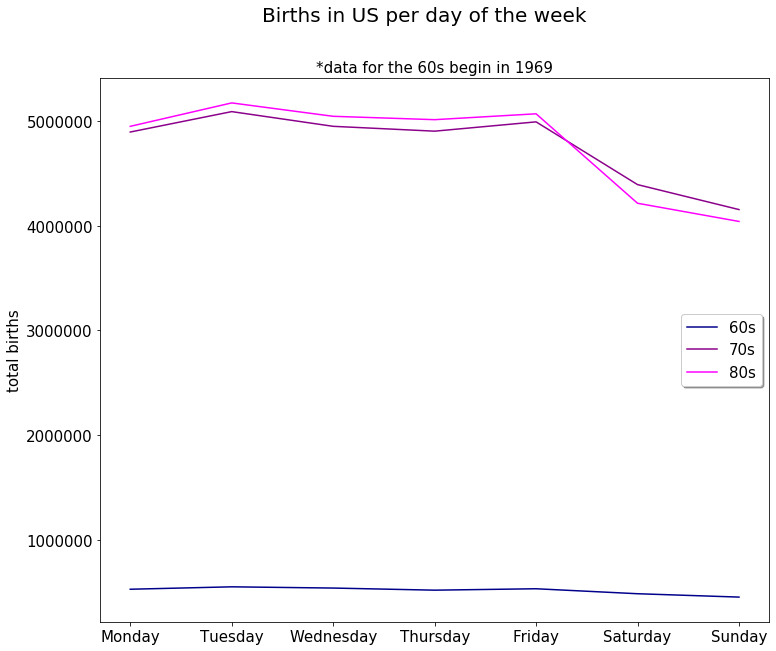

In [426]:
# Finally we can plot our findings and estimate how many birthday cards we have to print per day of the week
# and per decade
fig = plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size' : 15})
plt.suptitle("Births in US per day of the week", fontsize=20)
plt.title("*data for the 60s begin in 1969", fontsize=15)
plt.ylabel("total births")
plt.plot(six.index, six['births'], color="darkblue", label='60s')
plt.plot(sev.index, sev['births'], color="darkmagenta", label='70s')
plt.plot(eig.index, eig['births'], color="magenta", label='80s')
legend = plt.legend(loc='right', shadow=True)
plt.show()